# Text Classification mit XGBoost

In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import xgboost as xgb# used model

In [2]:
test_no_stop = pd.read_csv('../../../Data-Preparation/testdata_without_stopwords_preprocessed.csv')

In [3]:
test_no_stop.head()

,Text,target
0,would like even little bit time work Laying 11...,0
1,Looking forward keeping touch Naomi long time ...,4
2,Germany NBA airtime got International LP watch...,0
3,future trouble favourite Bagley probably Runni...,4
4,know reason Opera popular mobile platform Fire...,4


## Vorbereitung

In [4]:
test_no_stop['target'] = test_no_stop['target'].replace(4,1)


In [5]:
X_test_no_stop = test_no_stop.drop(['target'], axis=1).copy()

In [6]:
Y_test_no_stop = test_no_stop['target'].copy()

## Modelltraining ohne Stopwords

In [7]:
vectorizer = TfidfVectorizer()
# astype(str) is necesarry 

X_testing_no_stop = vectorizer.fit_transform(X_test_no_stop['Text'].astype(str))

In [8]:
model = xgb.XGBClassifier(n_jobs = -1)
model.fit(X_testing_no_stop, Y_test_no_stop)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
predictions_no_stop = model.predict(X_testing_no_stop)

## Evaluation

In [10]:
# calculate metrics
accuracy = accuracy_score(Y_test_no_stop, predictions_no_stop)
precision = precision_score(Y_test_no_stop, predictions_no_stop, pos_label=1)
recall = recall_score(Y_test_no_stop, predictions_no_stop, pos_label=1)
f1 = f1_score(Y_test_no_stop, predictions_no_stop, pos_label=1)

# visualize metrics
print('XGBoost without Stopwords')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

XGBoost without Stopwords
Accuracy: 0.74
Precision: 0.71
Recall: 0.84
F1 Score: 0.77


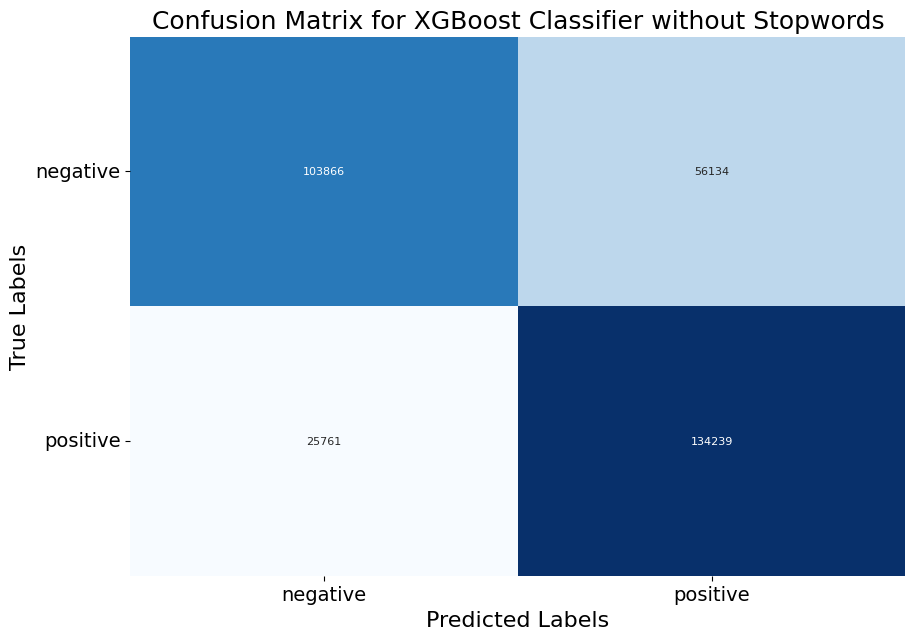

In [11]:
cm_nb = confusion_matrix(Y_test_no_stop, predictions_no_stop)


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 8})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for XGBoost Classifier without Stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()